#*Exam project for the course _Applied Machine Learning (basic and advanced)_*
Professor: Prof. D. Bonacorsi

Student: Stefano Bosio (DS&C)


---
## Chemoinformatic Application of Unsupervised and Supervised Machine Learning ##

In this project, I will start from a public dataset containing all the molecules known to be active toward HIV and those that have no effect. The first step will be the calculation of several descriptors using state-of-the-art libraries. Then, we will compute the chemical space explored by this dataset.

This is a routine operation often used in Drug Discovery campaigns to understand the coverage of our selected dataset, as well as the chemical diversity between the contained molecules. Eventually, we will apply ML techniques to classify the molecules into the two groups.

## Install required packages

To calculate chemical properties, the reference package is RDKit. Recently, another package called Mordred has emerged due to the large number of chemical descriptors available.

In [ ]:
! pip install rdkit
! pip install mordred

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.9 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176723 sha256=8691a653b9230cc92cc1f1795c7333bd1cb2508cf0342935084d1feb5ea95690
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import rdkit, rdkit.Chem, rdkit.Chem.Draw
import numpy as np
import mordred,mordred.descriptors
from rdkit.Chem import Draw
from sklearn.model_selection import *
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
from seaborn import jointplot
from sklearn.decomposition import *
from sklearn.model_selection import *
from sklearn.manifold import *
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
!wget https://raw.githubusercontent.com/stefano-bosio/AML/main/HIV.csv

--2023-07-11 08:06:41--  https://raw.githubusercontent.com/stefano-bosio/AML/main/HIV.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2193844 (2.1M) [text/plain]
Saving to: ‘HIV.csv’

HIV.csv             100%[===================>]   2.09M  --.-KB/s    in 0.07s   

2023-07-11 08:06:41 (30.2 MB/s) - ‘HIV.csv’ saved [2193844/2193844]



In [ ]:
np.random.seed(24)

In [ ]:
drugs_data = pd.read_csv('HIV.csv')

In [ ]:
drugs_data

,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0
...,...,...,...
41122,CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...,CI,0
41123,Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...,CI,0
41124,Cc1ccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)C...,CI,0
41125,Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...,CI,0


In [ ]:
molecules = [rdkit.Chem.MolFromSmiles(smi) for smi in drugs_data.smiles]

[08:06:49] WARNING: not removing hydrogen atom without neighbors
[08:06:49] WARNING: not removing hydrogen atom without neighbors


The errors mentioned above are likely due to the non-standardized SMILES.

## Descriptors calculation

The first step in this project is to generate molecular descriptors for each input in the dataset. For this purpose, we will utilize RDKit to validate all the SMILES and convert them into molecules. Then, using both RDKit and Mordred, we will generate all the possible descriptors.

In [ ]:
calc = mordred.Calculator(mordred.descriptors, ignore_3D=False)

In [ ]:
valid_mols= [x for x in molecules if x != None]

In [ ]:
Y_valids=np.array(drugs_data['HIV_active'])[np.where(np.array(molecules)!=None)]

This step is very time-consuming, taking approximately 40 minutes to complete. To mitigate this, there are cells below that import the preprocessed data using pandas, thus bypassing this time-consuming step.



In [ ]:
features = calc.pandas(valid_mols)

In [ ]:
features

In [ ]:
features.to_csv("features_calculated.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
features=pd.read_csv("drive/MyDrive/features_calculated.csv")

<ipython-input-23-d85de6d108c2>:1: DtypeWarning: Columns (54,55,56,57,58,59,60,61,62,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,137,138,139,140,141,142,146,147,148,149,150,151,153,154,155,156,157,158,164,165,166,167,168,169,173,174,175,176,177,178,182,183,184,185,186,187,189,190,191,192,193,194,195,196,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,218,219,220,221,222,223,227,228,229,230,231,232,234,235,236,237,238,239,240,241,242,261,262,263,264,265,266,267,268,269,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,342,343,344,345,346,347,353,354,355,356,357,358,362,363,364,365,366,367,369,370,371,372,373,374,380,381,382,383,384,385,389,390,391,392,393,394,398,399,400,401,402,403,405,406,407,408,409,410,411,412,414,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,434,435,436,437,438,439,443,444,445,446,447,448,450,451,452,453,454,459,460,461,462,4

In [ ]:
features = features.select_dtypes(include=[float])

The next step is the standardization of all the descriptors (this will also serve as a check for invalid ones)

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(features)

In [ ]:
features_scaled=scaler.transform(features)

In [ ]:
features_scaled_df=pd.DataFrame(features_scaled)

In [ ]:
del features

In [ ]:

dataset=features_scaled_df.dropna(axis=1)

In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,433,434,435,436,437,438,439,440,441,442
0,-0.585507,-0.548072,-0.895535,-1.000463,-0.713707,-0.652001,-0.688608,-0.734844,-0.816729,-0.767324,...,-1.014272,-0.373169,-1.027290,-0.263820,-0.922759,-0.291621,-0.523076,-0.569749,-0.574090,-0.427904
1,1.196561,0.850215,0.468643,0.731859,0.702020,0.577676,0.490084,0.711640,0.966519,1.144907,...,-1.014272,0.950269,-1.027290,0.814259,0.510428,1.115260,0.020757,1.138426,1.046788,1.103285
2,-0.293858,-0.463341,-0.518990,-0.280429,-0.319496,-0.238603,-0.261217,-0.288510,-0.405114,-0.493775,...,-1.014272,0.195470,-1.027290,0.308119,-0.723491,-0.453188,0.106994,-0.234215,-0.162636,-0.417416
3,-0.110309,-0.014719,0.091976,-0.636969,0.275725,-0.185176,-0.043104,-0.042785,-0.321530,0.023968,...,-1.014272,0.154714,-1.027290,0.145436,-0.539433,0.002015,0.757288,-0.112202,-0.175105,-0.249615
4,-1.305592,-1.334798,-0.841962,-1.809290,-0.872033,-1.396197,-1.301722,-0.432723,-0.982322,-0.823437,...,-1.014272,-2.155054,-1.027290,-2.162979,-1.732151,-1.036111,1.937156,-1.332327,-1.421934,-1.371787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41122,0.312034,0.329428,-0.112068,0.200126,0.256754,0.448761,0.407424,0.270615,0.150803,-0.051888,...,1.182671,0.923486,1.152803,0.978042,0.808908,0.055035,-0.947381,0.467357,0.622866,0.117451
41123,1.074570,0.995778,0.611996,1.048848,1.099787,1.046737,1.075172,0.983620,1.097045,0.965154,...,1.305607,1.461935,1.221245,1.430870,1.436766,0.660437,-0.688721,1.290942,1.458242,0.631343
41124,0.780403,0.697150,0.139780,0.554729,0.566222,0.716926,0.782865,0.693584,0.647580,0.474168,...,1.182671,1.256642,1.152803,1.251674,1.165021,0.406828,-0.881099,0.955407,1.096661,0.432079
41125,0.780403,0.718811,0.139780,0.554729,0.569779,0.732338,0.801637,0.725005,0.645214,0.462478,...,1.182671,1.258383,1.152803,1.254978,1.165196,0.406828,-0.881099,0.955407,1.096661,0.432079


##Dataset Exploration and Chemical Space Analysis##

Once all the metrics have been obtained and standardized, a key visualization frequently used in chemoinformatics is the description of the chemical space covered by a database.

Depending on the intended use, it can be beneficial to have a widely spread chemical space (e.g., for virtual screening or diversity search) or a focused one (if searching for known scaffolds).

As depicted in the image above, this specific database contains a diverse range of chemical motifs in terms of chemical variability and molecular weight.

In [ ]:
subset = [x for x in valid_mols[10:16]]

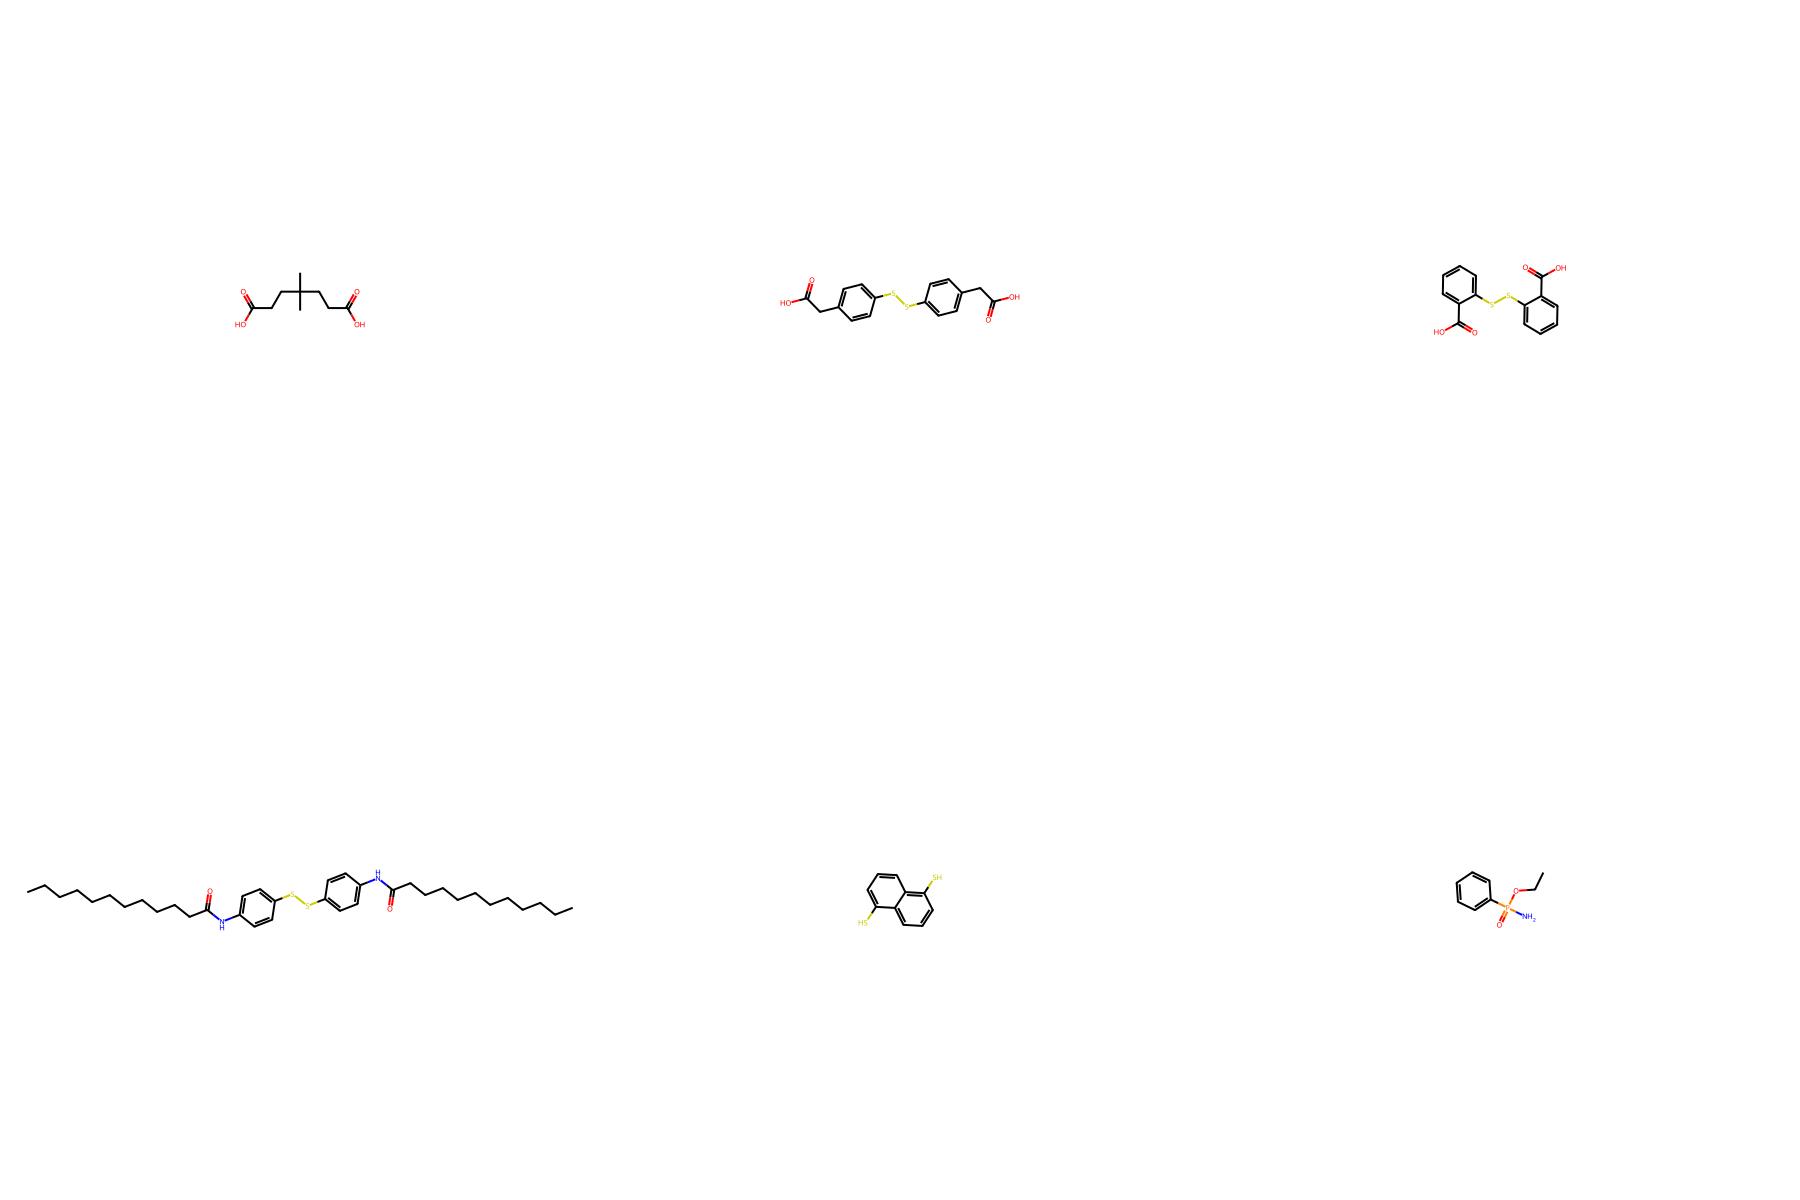

In [ ]:
rdkit.Chem.Draw.MolsToGridImage(subset, molsPerRow=3, subImgSize=(600, 600))

In [ ]:
pca= PCA(n_components=2)

In [ ]:
pca_space=pca.fit_transform(dataset)

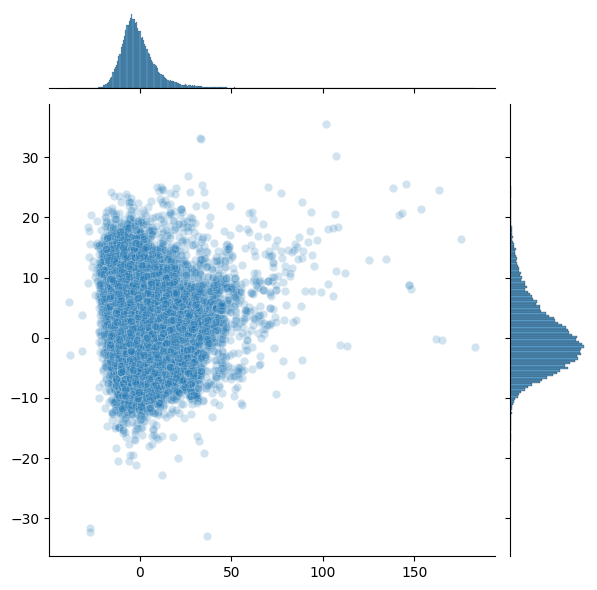

In [ ]:
jointplot(x=pca_space[:,0],y=pca_space[:,1],alpha=0.2)

In [ ]:
tsne= TSNE()

In [ ]:
tsne_space=tsne.fit_transform(dataset)

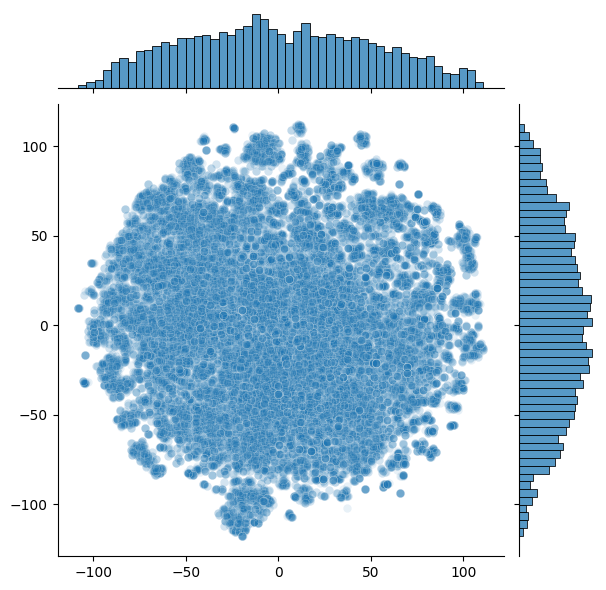

In [ ]:
jointplot(x=tsne_space[:,0],y=tsne_space[:,1],alpha=0.1)

## Classification tasks

In [ ]:
## SVC

In [ ]:
X = dataset.values
Y = Y_valids

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


In [ ]:
svc=SVC()

In [ ]:
svc.fit(X_train,y_train)

SVC()

In [ ]:
y_predict=svc.predict(X_test)

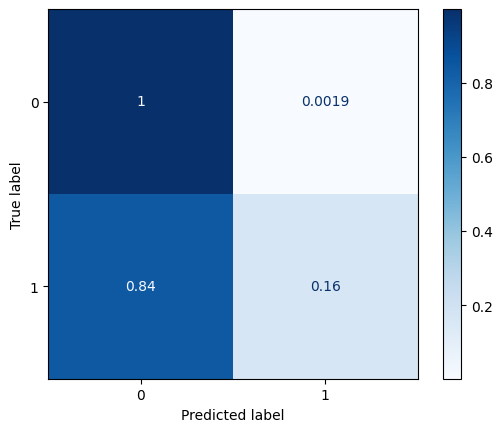

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc,X_test,y_test,cmap=plt.cm.Blues,normalize="true")

The extremely poor performance could potentially be attributed to data imbalance. To address this issue, it may be useful to remove a portion of the negative examples from the dataset in order to achieve a more balanced dataset. However, for chemical structures, data augmentation is not a straightforward process due to the complex steric and topological features involved in ligand binding. Even small changes, such as adding a methyl group or replacing an oxygen atom with a sulfur atom, can significantly alter the molecule's activity.

Another approach to mitigate the impact of data imbalance is adjusting the weight of the active class while preserving all the samples in the dataset. This weighting scheme can help give more importance to the minority class during the training process.

In [ ]:
x_inactive=X[(np.where(Y==0)[0])]
x_active=X[(np.where(Y==1)[0])]

In [ ]:
x_neg_selected=x_inactive[np.random.randint(len(x_inactive), size=len(x_active))]

In [ ]:
y_neg=np.zeros((len(x_neg_selected)))
y_act=np.ones((len(x_active)))

In [ ]:
x_red=np.concatenate((x_neg_selected,x_active),axis=0)
y_red=np.concatenate((y_neg,y_act),axis=0)

In [ ]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(x_red, y_red, test_size=0.3, random_state=1)


In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [ ]:
grid.fit(X_train_red, y_train_red)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   1.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   1.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   1.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   1.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   1.4s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.750 total time=   1.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.673 total time=   1.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.693 total time=   0.8s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.681 total time=   0.7s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.678 total time=   1.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.507 total time=   0.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [ ]:
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     11898
           1       0.14      0.83      0.24       441

    accuracy                           0.81     12339
   macro avg       0.57      0.82      0.57     12339
weighted avg       0.96      0.81      0.87     12339



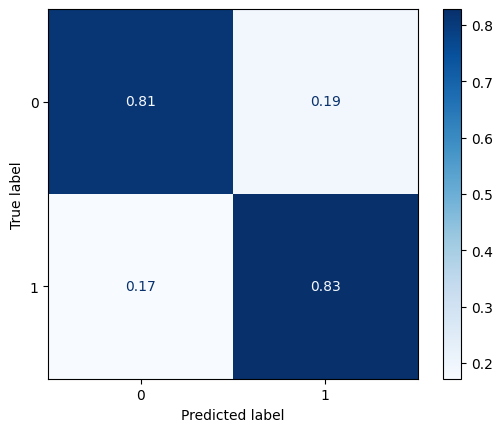

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid,X_test,y_test,cmap=plt.cm.Blues,normalize="true")

In [ ]:
svc=SVC(class_weight={1:10})

In [ ]:
svc.fit(X_train,y_train)

SVC(class_weight={1: 10})

In [ ]:
y_predict=svc.predict(X_test)

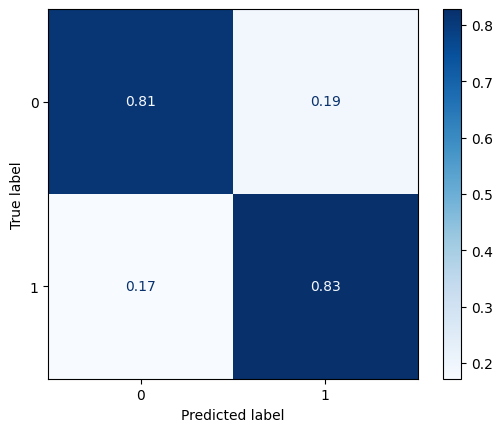

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid,X_test,y_test,cmap=plt.cm.Blues,normalize="true")

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly']}

grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.965 total time=16.1min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.965 total time=16.0min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.965 total time=16.1min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.965 total time=16.1min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.965 total time=16.1min
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.951 total time= 3.4min
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.944 total time= 3.3min
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.954 total time= 3.4min
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.948 total time= 3.2min
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.952 total time= 3.1min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.966 total time=12.2min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

Due to practical reasons and limitations in Google Colab, the last optimization, which involves adjusting the weights of the active class, may not be feasible within the given wall time limit.

In [ ]:
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

In [ ]:
y_predict=grid.predict(X_test)


In [ ]:
ConfusionMatrixDisplay.from_estimator(grid,X_test,y_test,cmap=plt.cm.Blues,normalize="normalize")

## Conclusions ##

To summorize, we :


*   Generated molecular descriptors.
*   Prepared this data for further analysis.
*   Used both linear and non-linear dimensionality reduction techniques to explore the chemical space
*   Employed the Support Vector Classifier (SVC), optimized hyperparameters, and experimented with various data balancing strategies.


Although this was a simplified test case, these steps demonstrate the significance of machine learning techniques and data preparation procedures in the analysis of data, which form one of the foundations of Drug Discovery pipelines.

## Sources


*   RDKit: Open-source cheminformatics. https://www.rdkit.org
*   Moriwaki, H., Tian, YS., Kawashita, N. et al. Mordred: a molecular descriptor calculator. J Cheminform 10, 4 (2018). https://doi.org/10.1186/s13321-018-0258-y
*   Zhenqin Wu, Bharath Ramsundar, Evan N. Feinberg, Joseph Gomes, Caleb Geniesse, Aneesh S. Pappu, Karl Leswing, Vijay Pande, MoleculeNet: A Benchmark for Molecular Machine Learning, arXiv preprint,
https://doi.org/10.48550/arXiv.1703.00564
